### 4.1 Understanding of the data
##### Importing the necessary libraries and loading the datasets

In [155]:
# first, you import the necessary libraries
import pandas as pd

In [156]:
# load the datasets
df = pd.read_csv('credit_card_default.csv')
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
0,1,20000,2,2,1,24.0,2,2,-1,-1,...,0.0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26.0,-1,2,0,0,...,3272.0,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34.0,0,0,0,0,...,14331.0,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37.0,0,0,0,0,...,28314.0,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57.0,-1,0,-1,0,...,20940.0,19146,19131,2000,36681,10000,9000,689,679,0


default_payment_next_month is likely the target variable, as it indicates whether the customer will default on their credit card payment in the next month.

In [157]:
#summary statistics for numerical features
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,29997.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,3.000000e+04,29996.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485082,-0.016700,-0.133767,-0.166200,-0.220667,...,4.701315e+04,43254.798973,40311.400967,38871.760400,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217423,1.123802,1.197186,1.196868,1.169139,...,6.934939e+04,64310.642233,60797.155770,59554.107537,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2.666250e+03,2324.500000,1763.000000,1256.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,2.008850e+04,19052.000000,18104.500000,17071.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,6.016475e+04,54506.000000,50190.500000,49198.250000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,1.664089e+06,891586.000000,927171.000000,961664.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  int64  
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         29997 non-null  float64
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  object 
 13  BILL_AMT2                   300

In [159]:
# create a stop-point
data = df.copy()

In [160]:
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
0,1,20000,2,2,1,24.0,2,2,-1,-1,...,0.0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26.0,-1,2,0,0,...,3272.0,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34.0,0,0,0,0,...,14331.0,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37.0,0,0,0,0,...,28314.0,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57.0,-1,0,-1,0,...,20940.0,19146,19131,2000,36681,10000,9000,689,679,0


In [161]:
# dropping ID as it does not play any significant role in predicting the target
data = data.drop('ID', axis=1)


##### Using descriptive statistics to analyze the data

In [162]:
# use .info to get concise suummary of the data
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LIMIT_BAL                   30000 non-null  int64  
 1   SEX                         30000 non-null  int64  
 2   EDUCATION                   30000 non-null  int64  
 3   MARRIAGE                    30000 non-null  int64  
 4   AGE                         29997 non-null  float64
 5   PAY_0                       30000 non-null  int64  
 6   PAY_2                       30000 non-null  int64  
 7   PAY_3                       30000 non-null  int64  
 8   PAY_4                       30000 non-null  int64  
 9   PAY_5                       30000 non-null  int64  
 10  PAY_6                       30000 non-null  int64  
 11  BILL_AMT1                   30000 non-null  object 
 12  BILL_AMT2                   30000 non-null  object 
 13  BILL_AMT3                   300

In [163]:
# descriptive statistics for numerical columns
data.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
count,30000.000000,30000.000000,30000.000000,30000.000000,29997.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,3.000000e+04,29996.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485082,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,4.701315e+04,43254.798973,40311.400967,38871.760400,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217423,1.123802,1.197186,1.196868,1.169139,1.133187,...,6.934939e+04,64310.642233,60797.155770,59554.107537,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2.666250e+03,2324.500000,1763.000000,1256.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.008850e+04,19052.000000,18104.500000,17071.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,6.016475e+04,54506.000000,50190.500000,49198.250000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,1.664089e+06,891586.000000,927171.000000,961664.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [164]:
# for correlation analysis, use the .corr function
data.corr

<bound method DataFrame.corr of        LIMIT_BAL  SEX  EDUCATION  MARRIAGE   AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0          20000    2          2         1  24.0      2      2     -1     -1   
1         120000    2          2         2  26.0     -1      2      0      0   
2          90000    2          2         2  34.0      0      0      0      0   
3          50000    2          2         1  37.0      0      0      0      0   
4          50000    1          2         1  57.0     -1      0     -1      0   
...          ...  ...        ...       ...   ...    ...    ...    ...    ...   
29995     220000    1          3         1  39.0      0      0      0      0   
29996     150000    1          3         2  43.0     -1     -1     -1     -1   
29997      30000    1          2         2  37.0      4      3      2     -1   
29998      80000    1          3         1  41.0      1     -1      0      0   
29999      50000    1          2         1  46.0      0      0      0      0   

       

In [165]:
# descriptive statistics for categorical columns
data[['SEX', 'EDUCATION', 'MARRIAGE']].describe()

,SEX,EDUCATION,MARRIAGE
count,30000.000000,30000.000000,30000.000000
mean,1.603733,1.853133,1.551867
std,0.489129,0.790349,0.521970
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000
50%,2.000000,2.000000,2.000000
75%,2.000000,2.000000,2.000000
max,2.000000,6.000000,3.000000


In [166]:
# Distribution of categorical features
print(df['SEX'].value_counts())
print(df['EDUCATION'].value_counts())
print(df['MARRIAGE'].value_counts())


SEX
2    18112
1    11888
Name: count, dtype: int64
EDUCATION
2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: count, dtype: int64
MARRIAGE
2    15964
1    13659
3      323
0       54
Name: count, dtype: int64


In [167]:
data_summary = data.describe()
print("Data Summary:\n", data_summary)

Data Summary:
             LIMIT_BAL           SEX     EDUCATION      MARRIAGE           AGE  \
count    30000.000000  30000.000000  30000.000000  30000.000000  29997.000000   
mean    167484.322667      1.603733      1.853133      1.551867     35.485082   
std     129747.661567      0.489129      0.790349      0.521970      9.217423   
min      10000.000000      1.000000      0.000000      0.000000     21.000000   
25%      50000.000000      1.000000      1.000000      1.000000     28.000000   
50%     140000.000000      2.000000      2.000000      2.000000     34.000000   
75%     240000.000000      2.000000      2.000000      2.000000     41.000000   
max    1000000.000000      2.000000      6.000000      3.000000     79.000000   

              PAY_0         PAY_2         PAY_3         PAY_4         PAY_5  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean      -0.016700     -0.133767     -0.166200     -0.220667     -0.266200   
std        1.12380

Potential Bias Introduced by the 'MARRIAGE' Feature:

1. Representation Bias: The data is imbalanced, with many more individuals labeled as married compared to single or separated. This imbalance may cause the model to focus on the larger group and perform poorly on predictions for less-represented groups.

2. Prejudicial Bias: The model could learn societal stereotypes, such as associating divorced individuals with higher credit risk, which can lead to unfair predictions based on marital status rather than true financial behavior.

3. Proxy Bias: Marital status may serve as a proxy for other variables, like income or financial responsibilities. If the model correlates being married with lower risk, it might overlook more relevant factors.

4. Spurious Correlation: The model could detect a relationship between marital status and credit risk that isn't genuinely significant, resulting in inaccurate predictions for new data.

5. Imbalanced Distribution: The unequal number of observations for each marital status may skew predictions, favoring outcomes based on the more common groups.

### 4.2 Data preprocessing
##### Handling missing values

In [168]:

# Checking for missing values in each column
missing_values = data.isnull().sum()
print(missing_values)

#  among the various methods of handling missing values,
# dropping the missing values is best here since
# the number of missing values is small and won't affect the target prediction

# Drop rows with missing values
data = data.dropna()

# Or drop columns with missing values
data = data.dropna(axis=1)


LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           3
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     4
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      3
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default_payment_next_month    0
dtype: int64


In [169]:
# checking for missing values ones again to verify that no more missing values
print(data.isnull().sum())


LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default_payment_next_month    0
dtype: int64


In [170]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29990 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LIMIT_BAL                   29990 non-null  int64  
 1   SEX                         29990 non-null  int64  
 2   EDUCATION                   29990 non-null  int64  
 3   MARRIAGE                    29990 non-null  int64  
 4   AGE                         29990 non-null  float64
 5   PAY_0                       29990 non-null  int64  
 6   PAY_2                       29990 non-null  int64  
 7   PAY_3                       29990 non-null  int64  
 8   PAY_4                       29990 non-null  int64  
 9   PAY_5                       29990 non-null  int64  
 10  PAY_6                       29990 non-null  int64  
 11  BILL_AMT1                   29990 non-null  object 
 12  BILL_AMT2                   29990 non-null  object 
 13  BILL_AMT3                   29990 no

Standardization of numerical features

In [171]:
# import necessary libraries
from sklearn.preprocessing import StandardScaler
# standardize to get mean of 0 and stdv of 1

In [172]:
# make stop point
data_unscaled = data.copy()
data_unscaled.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
0,20000,2,2,1,24.0,2,2,-1,-1,-2,...,0.0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26.0,-1,2,0,0,0,...,3272.0,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34.0,0,0,0,0,0,...,14331.0,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37.0,0,0,0,0,0,...,28314.0,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57.0,-1,0,-1,0,0,...,20940.0,19146,19131,2000,36681,10000,9000,689,679,0


In [173]:
import numpy as np
data_unscaled.replace('na', np.nan, inplace=True)

In [174]:
# Replace '--' with NaN in the entire DataFrame
data_unscaled.replace('--', np.nan, inplace=True)

# Optionally, you can also check for other non-numeric values and replace them with NaN
# Then convert columns to their appropriate data types if needed
data_unscaled = data.apply(pd.to_numeric, errors='coerce')

# After replacing, you can handle the missing values (e.g., using fillna or dropna)
# For example, you can drop rows with missing values
data.dropna(inplace=True)

# Or you can fill them with a specific value, like the mean or median of the column
# data.fillna(data.mean(), inplace=True)


In [175]:
# Separate numerical and categorical features
numerical_data = data.select_dtypes(include=['int64', 'float64'])
categorical_data = data.select_dtypes(include=['object', 'category'])

categorical_data.head()

,BILL_AMT1,BILL_AMT2,PAY_AMT1
0,3913,3102,0
1,2682,1725,0
2,29239,14027,1518
3,46990,48233,2000
4,8617,5670,2000


In [176]:
numerical_data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
0,20000,2,2,1,24.0,2,2,-1,-1,-2,...,689,0.0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26.0,-1,2,0,0,0,...,2682,3272.0,3455,3261,1000,1000,1000,0,2000,1
2,90000,2,2,2,34.0,0,0,0,0,0,...,13559,14331.0,14948,15549,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37.0,0,0,0,0,0,...,49291,28314.0,28959,29547,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57.0,-1,0,-1,0,0,...,35835,20940.0,19146,19131,36681,10000,9000,689,679,0


In [177]:
numerical_data.columns.values

array(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT3',
       'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default_payment_next_month'],
      dtype=object)

In [178]:
# initializing the scaler
scaler = StandardScaler()

# Fit and transform the numerical features
numerical_columns  = ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT3',
       'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default_payment_next_month']

data_unscaled[numerical_columns] = scaler.fit_transform(data_unscaled[numerical_columns])


In [179]:
num_data_scaled =  data_unscaled[numerical_columns].copy()

In [180]:
num_data_scaled


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
0,-1.136812,0.810159,0.186016,-1.057315,-1.246017,1.794581,1.782379,-0.696483,-0.666427,-1.529807,...,-0.668048,-0.672553,-0.663131,-0.652803,-0.227092,-0.296729,-0.308052,-0.314086,-0.293372,1.876885
1,-0.365980,0.810159,0.186016,0.858514,-1.029048,-0.874816,1.782379,0.139051,0.188888,0.235004,...,-0.639300,-0.621677,-0.606282,-0.598024,-0.213596,-0.239922,-0.244229,-0.314086,-0.180884,1.876885
2,-0.597229,0.810159,0.186016,0.858514,-0.161168,0.014983,0.111851,0.139051,0.188888,0.235004,...,-0.482404,-0.449720,-0.417174,-0.391606,-0.191899,-0.239922,-0.244229,-0.248641,-0.012152,-0.532798
3,-0.905562,0.810159,0.186016,-1.057315,0.164286,0.014983,0.111851,0.139051,0.188888,0.235004,...,0.033015,-0.232298,-0.186634,-0.156463,-0.169377,-0.228561,-0.237846,-0.244126,-0.237128,-0.532798
4,-0.905562,-1.234326,0.186016,-1.057315,2.333985,-0.874816,0.111851,-0.696483,0.188888,0.235004,...,-0.161082,-0.346957,-0.348099,-0.331435,1.334780,0.271337,0.266354,-0.268994,-0.255182,-0.532798
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.404853,-1.234326,1.451296,-1.057315,0.381256,0.014983,0.111851,0.139051,0.188888,0.235004,...,2.327590,0.695823,-0.149151,-0.384366,0.610908,-0.012525,-0.113583,0.013136,-0.237128,-0.532798
29996,-0.134730,-1.234326,1.451296,0.858514,0.815196,-0.874816,-0.723413,-0.696483,-0.666427,0.235004,...,-0.627472,-0.532939,-0.577734,-0.652803,-0.103981,0.214417,-0.299818,-0.314086,-0.293372,-0.532798
29997,-1.059729,-1.234326,0.186016,0.858514,0.164286,3.574179,2.617643,1.810120,-0.666427,0.235004,...,-0.638204,-0.347921,-0.324471,-0.327638,-0.256991,0.953017,-0.039996,-0.183197,-0.119015,1.876885
29998,-0.674313,-1.234326,1.451296,-1.057315,0.598226,0.904782,-0.723413,0.139051,0.188888,0.235004,...,0.422666,0.148031,-0.468067,0.169374,-0.109058,-0.229810,-0.185129,3.152106,-0.191907,1.876885


In [181]:
categorical_data.columns.values

array(['BILL_AMT1', 'BILL_AMT2', 'PAY_AMT1'], dtype=object)

In [182]:
categorical_columns = ['BILL_AMT1', 'BILL_AMT2', 'PAY_AMT1']

Using label encoding to encode the categorical variables

In [185]:
# import the necessary libraries
from sklearn.preprocessing import LabelEncoder

label_encoder =  LabelEncoder()

# applying label encoding to the categorical variables
cat_data_scaled['BILL_AMT1'] = label_encoder.fit_transform(data_unscaled['BILL_AMT1'])
cat_data_scaled['BILL_AMT2'] = label_encoder.fit_transform(data_unscaled['BILL_AMT2'])
cat_data_scaled['PAY_AMT1'] = label_encoder.fit_transform(data_unscaled['PAY_AMT1'])

C:\Users\HP\AppData\Local\Temp\ipykernel_3160\3434164728.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_data_scaled['BILL_AMT1'] = label_encoder.fit_transform(data_unscaled['BILL_AMT1'])
C:\Users\HP\AppData\Local\Temp\ipykernel_3160\3434164728.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_data_scaled['BILL_AMT2'] = label_encoder.fit_transform(data_unscaled['BILL_AMT2'])
C:\Users\HP\AppData\Local\Temp\ipykernel_3160\3434164728.py:9: SettingWithCopyWarning: 
A value is trying to be set on a

In [186]:
#cat_data_scaled = data_unscaled[categorical_columns]
cat_data_scaled

,BILL_AMT1,BILL_AMT2,PAY_AMT1
0,2710,2306,0
1,2064,1547,0
2,10065,6072,1211
3,12727,12965,1674
4,4628,3418,1674
...,...,...,...
29995,20971,20809,5201
29996,1476,1606,1520
29997,2533,2430,0
29998,56,16302,7762


In [187]:
data_unscaled[categorical_columns]


,BILL_AMT1,BILL_AMT2,PAY_AMT1
0,3913.0,3102.0,0.0
1,2682.0,1725.0,0.0
2,29239.0,14027.0,1518.0
3,46990.0,48233.0,2000.0
4,8617.0,5670.0,2000.0
...,...,...,...
29995,188948.0,192815.0,8500.0
29996,1683.0,1828.0,1837.0
29997,3565.0,3356.0,0.0
29998,-1645.0,78379.0,85900.0


In [188]:
import matplotlib.pyplot as plt
import seaborn as sns

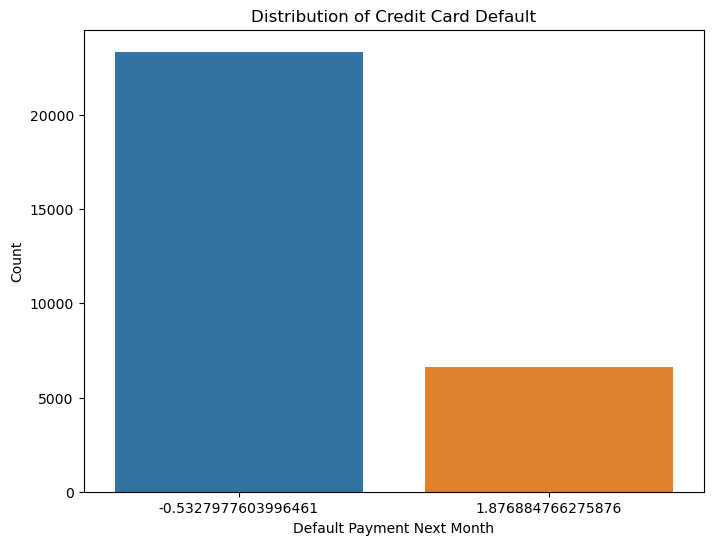

In [190]:
plt.figure(figsize=(8, 6))
sns.countplot(x='default_payment_next_month', data=data_scaled)
plt.title('Distribution of Credit Card Default')
plt.xlabel('Default Payment Next Month')
plt.ylabel('Count')
plt.show()

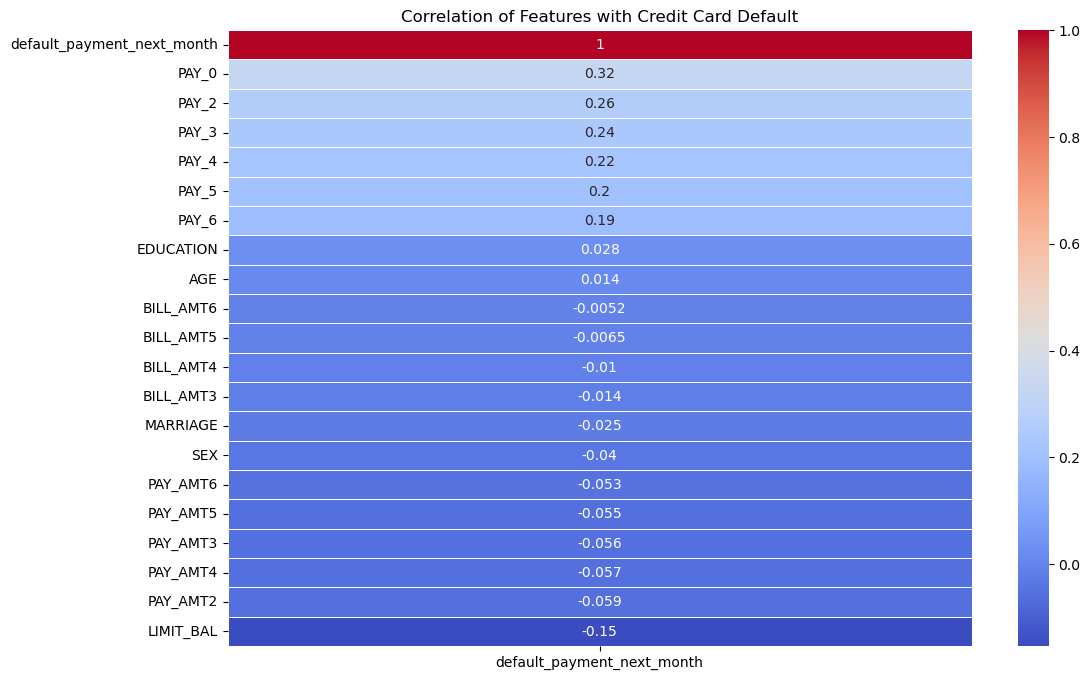

In [192]:
# Calculate the correlation matrix
correlation_matrix = data_scaled.corr()

# Plot the heatmap for correlation with the target variable
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix[['default_payment_next_month']].sort_values(by='default_payment_next_month', ascending=False),
            annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation of Features with Credit Card Default')
plt.show()


the pays are the features with the strongest correlation

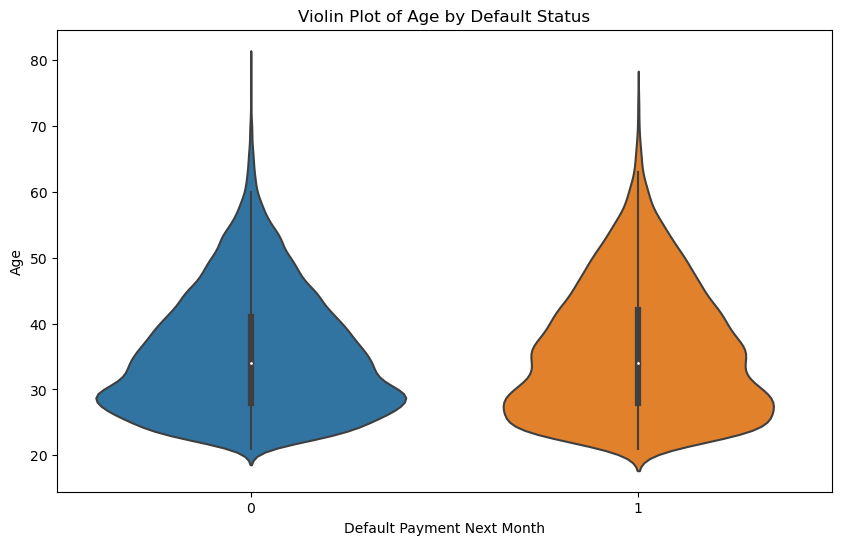

In [193]:
# Violin plot for a selected feature against the target
plt.figure(figsize=(10, 6))
sns.violinplot(x='default_payment_next_month', y='AGE', data=data)
plt.title('Violin Plot of Age by Default Status')
plt.xlabel('Default Payment Next Month')
plt.ylabel('Age')
plt.show()


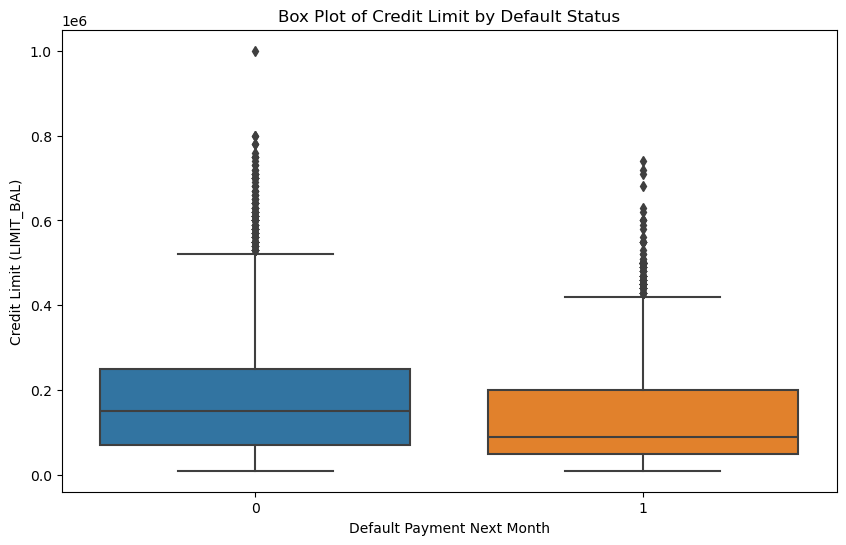

In [194]:
# Box plot for a selected feature (e.g., LIMIT_BAL) against the target variable
plt.figure(figsize=(10, 6))
sns.boxplot(x='default_payment_next_month', y='LIMIT_BAL', data=data)
plt.title('Box Plot of Credit Limit by Default Status')
plt.xlabel('Default Payment Next Month')
plt.ylabel('Credit Limit (LIMIT_BAL)')
plt.show()


In [196]:
# Assuming 'data' is your DataFrame containing all features and the target variable
# Define X as all features except the target column
X = data_scaled.drop(columns=['default_payment_next_month'])

# Define y as the target column
y = data_scaled['default_payment_next_month']


In [209]:
# Convert all numerical columns to float
data = data.astype(float)


ValueError: could not convert string to float: 'na'

In [197]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [199]:
X_train


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
25049,-0.905562,-1.234326,1.451296,0.858514,2.008530,0.014983,0.111851,0.139051,0.188888,0.235004,0.253201,0.457112,0.564263,-0.338358,-0.320885,-0.123855,-0.165562,-0.263759,-0.267227,-0.247926
628,-1.059729,-1.234326,1.451296,-1.057315,1.357620,0.014983,0.111851,0.139051,0.188888,0.235004,0.253201,-0.259357,-0.218506,-0.176860,-0.154011,-0.170201,-0.238047,-0.231464,-0.245042,-0.263562
17096,-0.751396,0.810159,-1.079264,0.858514,-1.246017,0.014983,0.111851,0.139051,0.188888,0.235004,0.253201,0.263188,0.306382,0.393376,0.346395,-0.126806,-0.172322,-0.167578,-0.171352,-0.157655
22599,0.559019,0.810159,2.716577,-1.057315,0.815196,-1.764615,-1.558676,-1.532017,-1.521742,-1.529807,-1.485837,-0.574389,-0.573071,-0.622028,-0.594580,0.055800,0.069674,-0.148622,-0.087256,-0.172110
13047,1.406935,0.810159,1.451296,-1.057315,1.574590,-0.874816,-0.723413,-0.696483,-0.666427,-0.647402,-0.616318,-0.187061,-0.654563,-0.521888,-0.617930,1.219913,-0.231003,0.239804,-0.178223,0.058997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29812,0.250686,-1.234326,0.186016,-1.057315,0.164286,0.014983,0.111851,0.139051,0.188888,0.235004,0.253201,1.293636,1.464380,1.608518,1.474117,1.044858,-0.061095,0.655673,0.211367,0.550512
5400,2.563184,0.810159,0.186016,0.858514,1.466105,-0.874816,-0.723413,-0.696483,0.188888,0.235004,-0.616318,4.878764,5.407845,-0.663131,-0.650284,16.459969,0.147556,-0.308052,-0.304269,-0.272955
870,-1.136812,0.810159,0.186016,2.774343,1.791560,0.014983,0.111851,0.139051,0.188888,0.235004,0.253201,-0.438135,-0.408873,-0.378243,-0.356078,-0.201576,-0.262247,-0.267907,-0.272332,-0.257319
15805,-1.059729,0.810159,1.451296,-1.057315,-1.354502,0.014983,0.111851,1.810120,0.188888,0.235004,0.253201,-0.246476,-0.206176,-0.213767,-0.186180,-0.256904,-0.198396,-0.238293,-0.246940,-0.182908


In [208]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


ValueError: Unknown label type: 'continuous'

In [201]:
# Ensure y is binary (0 or 1)
y = y.apply(lambda x: 1 if x >= 0.5 else 0)


In [207]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29990 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LIMIT_BAL                   29990 non-null  int64  
 1   SEX                         29990 non-null  int64  
 2   EDUCATION                   29990 non-null  int64  
 3   MARRIAGE                    29990 non-null  int64  
 4   AGE                         29990 non-null  float64
 5   PAY_0                       29990 non-null  int64  
 6   PAY_2                       29990 non-null  int64  
 7   PAY_3                       29990 non-null  int64  
 8   PAY_4                       29990 non-null  int64  
 9   PAY_5                       29990 non-null  int64  
 10  PAY_6                       29990 non-null  int64  
 11  BILL_AMT1                   29990 non-null  object 
 12  BILL_AMT2                   29990 non-null  object 
 13  BILL_AMT3                   29990 no